# Import the libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
UneploymentDF = pd.read_csv('COVIDUnemployment.csv')
UneploymentDF.head()

,State,cases,deaths,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018
0,Alabama,387786,14345,2216627,2130845,85782,3.9,49881
1,Alaska,18316,367,352662,329901,22761,6.5,74912
2,Arizona,426614,18857,3422583,3260518,162065,4.7,59079
3,Arkansas,161569,3301,1353305,1303995,49310,3.6,47094
4,California,2664110,102387,19280821,18460725,820096,4.3,75250


In [3]:
UneploymentDF = UneploymentDF.drop(columns = ['cases', 'deaths', 'Unemployment_rate_2018'])
UneploymentDF.head()

,State,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018
0,Alabama,2216627,2130845,85782,49881
1,Alaska,352662,329901,22761,74912
2,Arizona,3422583,3260518,162065,59079
3,Arkansas,1353305,1303995,49310,47094
4,California,19280821,18460725,820096,75250


In [4]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [5]:
UneploymentDF = pd.merge(UneploymentDF, COVID, how = 'left', on = 'State')
UneploymentDF.head()

,State,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,cases,deaths
0,Alabama,2216627,2130845,85782,49881,26912,785
1,Alaska,352662,329901,22761,74912,751,10
2,Arizona,3422583,3260518,162065,59079,39298,1228
3,Arkansas,1353305,1303995,49310,47094,13191,188
4,California,19280821,18460725,820096,75250,159098,5202


In [6]:
UneploymentDF.shape

(51, 7)

In [7]:
UneploymentDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         51 non-null     object
 1   Civilian_labor_force_2018     51 non-null     int64 
 2   Employed_2018                 51 non-null     int64 
 3   Unemployed_2018               51 non-null     int64 
 4   Median_Household_Income_2018  51 non-null     int64 
 5   cases                         51 non-null     int64 
 6   deaths                        51 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.2+ KB


In [8]:
UneploymentDF.isnull().sum()

State                           0
Civilian_labor_force_2018       0
Employed_2018                   0
Unemployed_2018                 0
Median_Household_Income_2018    0
cases                           0
deaths                          0
dtype: int64

In [9]:
UneploymentDF.describe()


,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,cases,deaths
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,3.164487e+06,3.041220e+06,123266.784314,62036.529412,41994.235294,2290.549020
std,3.569005e+06,3.422712e+06,147350.196414,10516.402800,63513.183767,4748.588326
min,2.914280e+05,2.800760e+05,8804.000000,44038.000000,614.000000,10.000000
25%,8.212015e+05,7.883060e+05,27425.500000,55340.500000,9231.500000,212.000000
50%,2.097202e+06,2.001995e+06,84967.000000,60071.000000,20152.000000,704.000000
75%,3.796251e+06,3.647934e+06,146783.500000,70838.000000,46961.500000,2469.500000
max,1.928082e+07,1.846072e+07,820096.000000,83076.000000,389349.000000,30683.000000


In [10]:
Pcorr = UneploymentDF.corr(method = 'pearson')
Pcorr

,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,cases,deaths
Civilian_labor_force_2018,1.000000,0.999987,0.993118,0.135606,0.667840,0.458642
Employed_2018,0.999987,1.000000,0.992515,0.135910,0.667330,0.457957
Unemployed_2018,0.993118,0.992515,1.000000,0.127574,0.674898,0.471257
Median_Household_Income_2018,0.135606,0.135910,0.127574,1.000000,0.259231,0.249071
cases,0.667840,0.667330,0.674898,0.259231,1.000000,0.957358
deaths,0.458642,0.457957,0.471257,0.249071,0.957358,1.000000


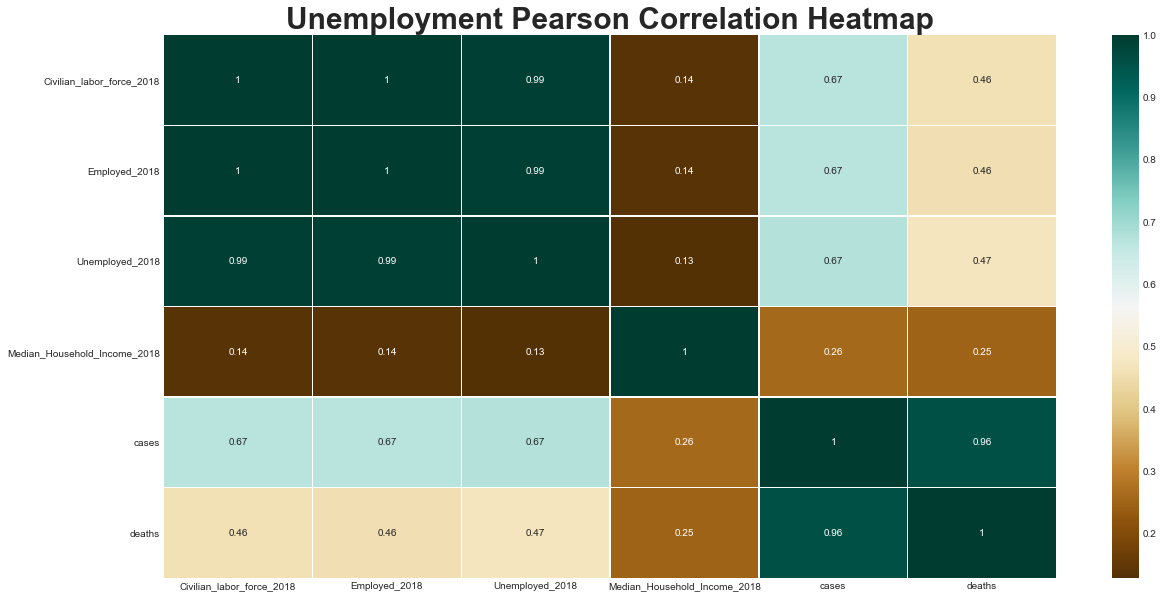

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Unemployment Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [12]:
Kcorr = UneploymentDF.corr(method = 'kendall')
Kcorr

,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,cases,deaths
Civilian_labor_force_2018,1.000000,0.992157,0.904314,0.049412,0.736471,0.663790
Employed_2018,0.992157,1.000000,0.896471,0.047843,0.738039,0.665359
Unemployed_2018,0.904314,0.896471,1.000000,0.029020,0.731765,0.674774
Median_Household_Income_2018,0.049412,0.047843,0.029020,1.000000,0.115294,0.131816
cases,0.736471,0.738039,0.731765,0.115294,1.000000,0.823853
deaths,0.663790,0.665359,0.674774,0.131816,0.823853,1.000000


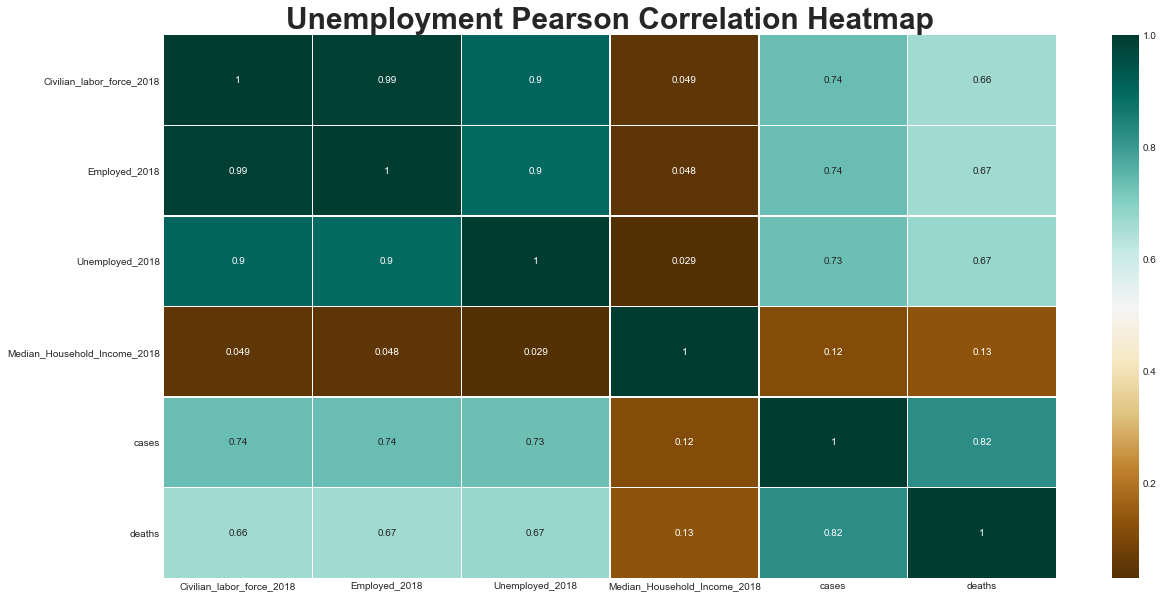

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Unemployment Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [14]:
Scorr = UneploymentDF.corr(method = 'spearman')
Scorr

,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,cases,deaths
Civilian_labor_force_2018,1.000000,0.999548,0.983801,0.037376,0.908054,0.851331
Employed_2018,0.999548,1.000000,0.980724,0.037104,0.906878,0.849476
Unemployed_2018,0.983801,0.980724,1.000000,0.019276,0.907421,0.866988
Median_Household_Income_2018,0.037376,0.037104,0.019276,1.000000,0.162262,0.183669
cases,0.908054,0.906878,0.907421,0.162262,1.000000,0.953189
deaths,0.851331,0.849476,0.866988,0.183669,0.953189,1.000000


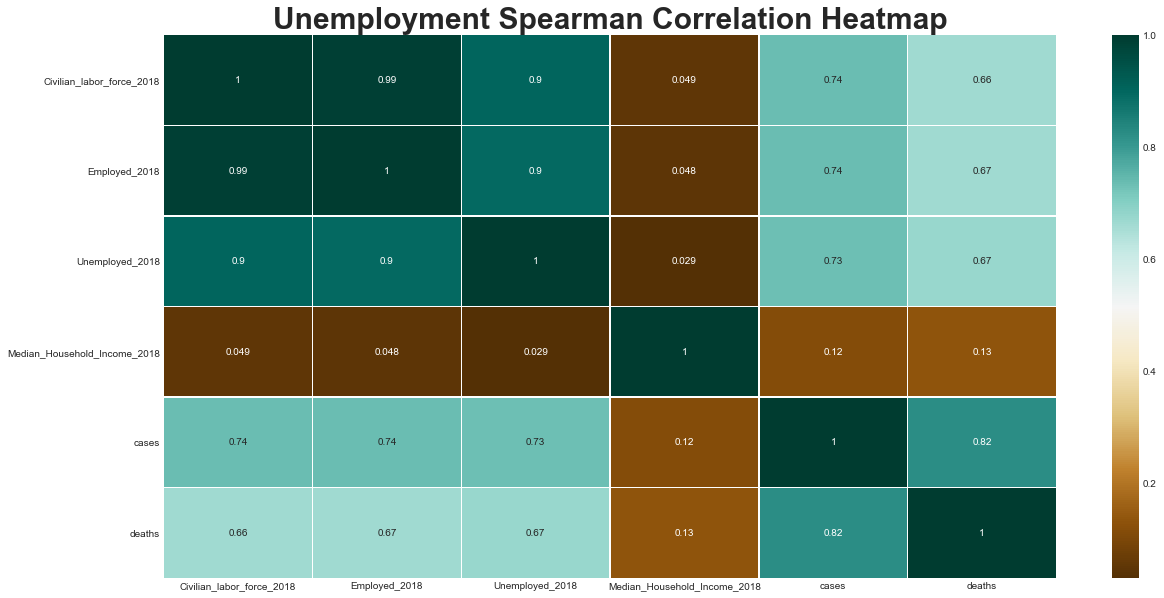

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Unemployment Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [16]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Unemployment'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([4, 5])

AllCorr

,Unemployment,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,Civilian_labor_force_2018,0.667840,0.736471,0.908054
1,Employed_2018,0.667330,0.738039,0.906878
2,Unemployed_2018,0.674898,0.731765,0.907421
3,Median_Household_Income_2018,0.259231,0.115294,0.162262


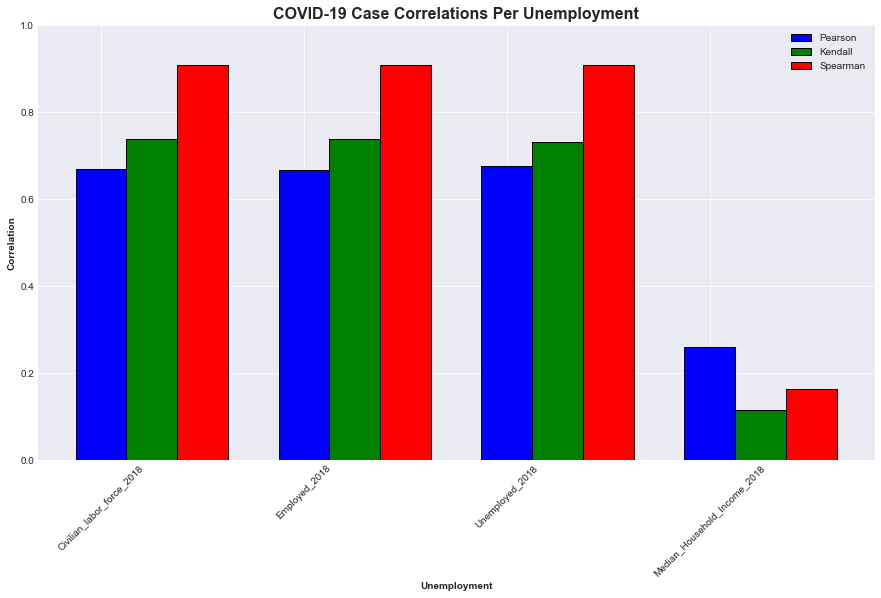

In [17]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Unemployment'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Unemployment', fontsize = 16, fontweight = 'bold')

plt.xlabel('Unemployment', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

# Histogram

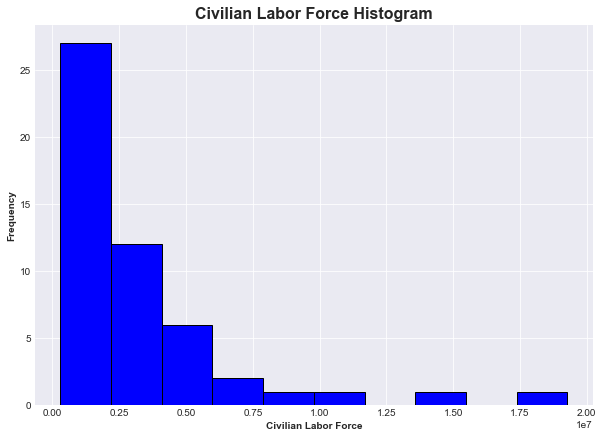

In [18]:
plt.style.use('seaborn-darkgrid')

UneploymentDF['Civilian_labor_force_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Civilian Labor Force Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Civilian Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

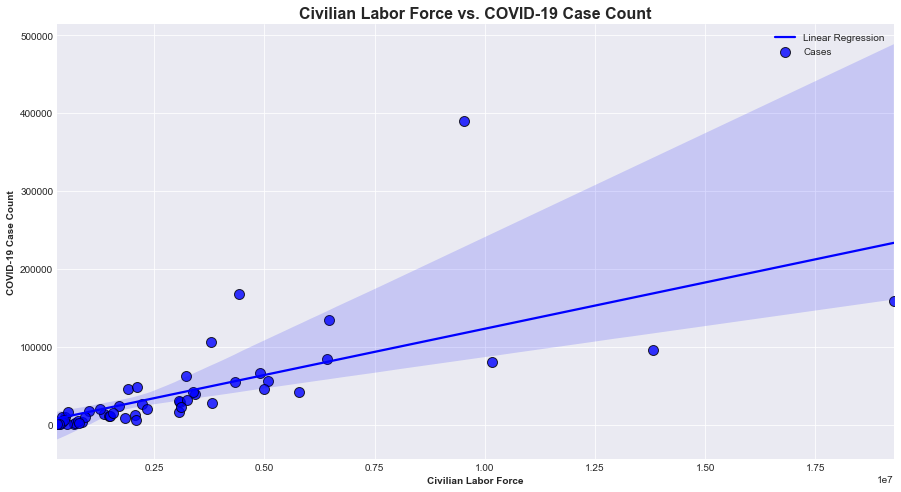

In [19]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Civilian_labor_force_2018', y = 'cases', data = UneploymentDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Civilian Labor Force vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Civilian Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [20]:
spearmanr(UneploymentDF['cases'], UneploymentDF['Civilian_labor_force_2018'])

SpearmanrResult(correlation=0.908054298642534, pvalue=3.764552627702452e-20)

In [21]:
model1 = sm.OLS(UneploymentDF['cases'], UneploymentDF['Civilian_labor_force_2018']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.615
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              79.87
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    6.13e-12
Time:                        00:14:29   Log-Likelihood:                         -620.93
No. Observations:                  51   AIC:                                      1244.
Df Residuals:                      50   BIC:                                      1246.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Civilian_labor_force_2018     0.0125      0.001      8.937      0.000       0.010       0.015
==============================================================================
Omnibus:                       73.009   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.227
Skew:                           3.726   Prob(JB):                    5.96e-193
Kurtosis:                      22.001   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

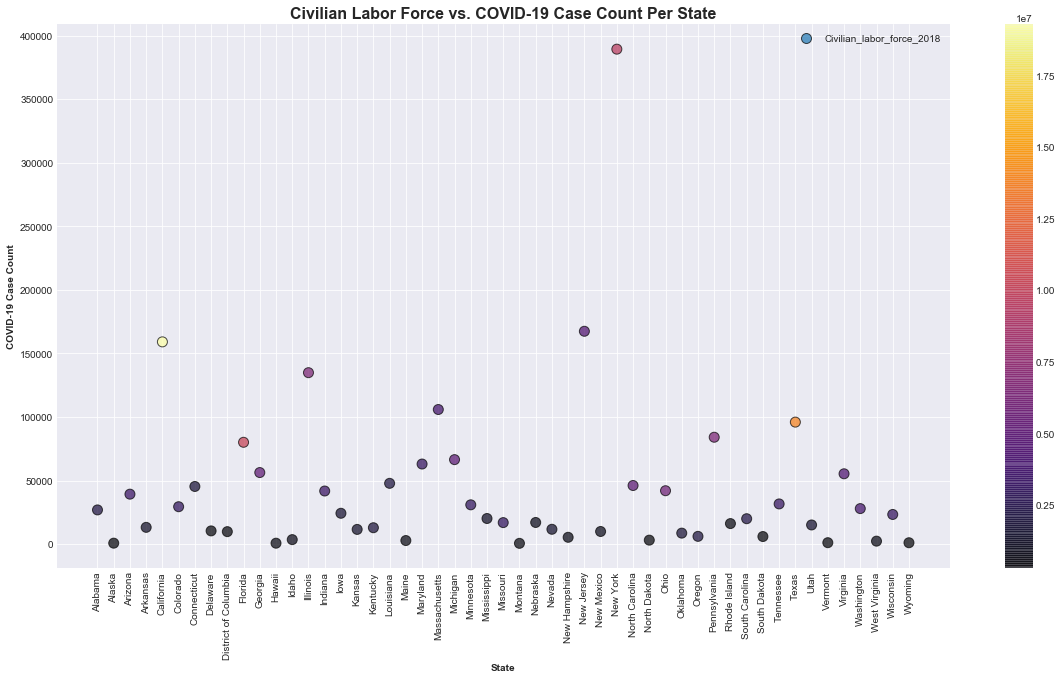

In [22]:
fig = plt.figure(figsize = (20,10))

x = UneploymentDF['State'] 
y = UneploymentDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = UneploymentDF['Civilian_labor_force_2018'], cmap = 'inferno')
plt.title('Civilian Labor Force vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Civilian_labor_force_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

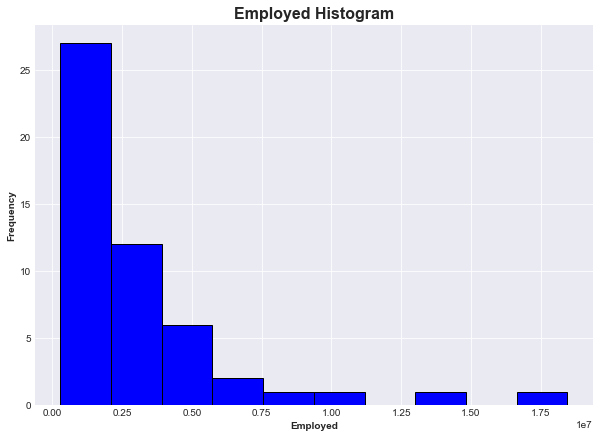

In [23]:
plt.style.use('seaborn-darkgrid')

UneploymentDF['Employed_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employed Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employed', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

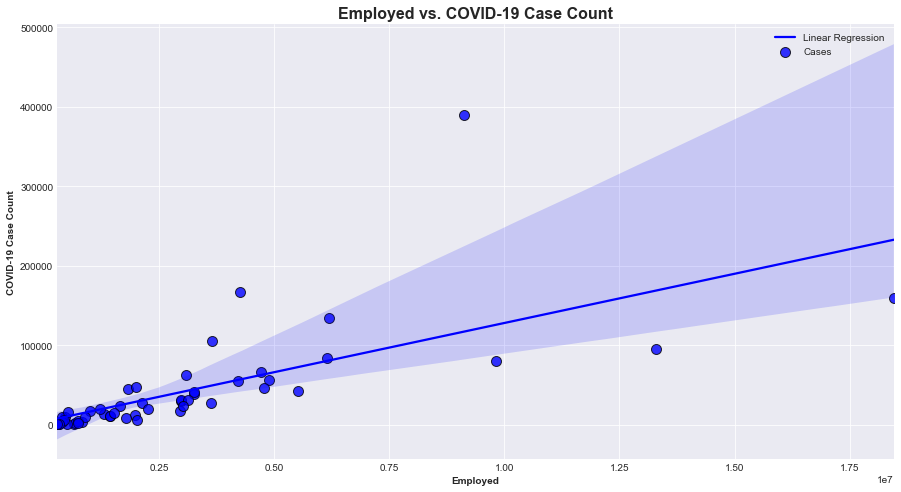

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employed_2018', y = 'cases', data = UneploymentDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employed vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employed', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
spearmanr(UneploymentDF['cases'], UneploymentDF['Employed_2018'])

SpearmanrResult(correlation=0.9068778280542987, pvalue=5.069537901309533e-20)

In [26]:
model2 = sm.OLS(UneploymentDF['cases'], UneploymentDF['Employed_2018']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.615
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              79.72
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    6.30e-12
Time:                        00:14:32   Log-Likelihood:                         -620.96
No. Observations:                  51   AIC:                                      1244.
Df Residuals:                      50   BIC:                                      1246.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Employed_2018     0.0130      0.001      8.929      0.000       0.010       0.016
==============================================================================
Omnibus:                       73.084   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.185
Skew:                           3.732   Prob(JB):                    2.24e-193
Kurtosis:                      22.021   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

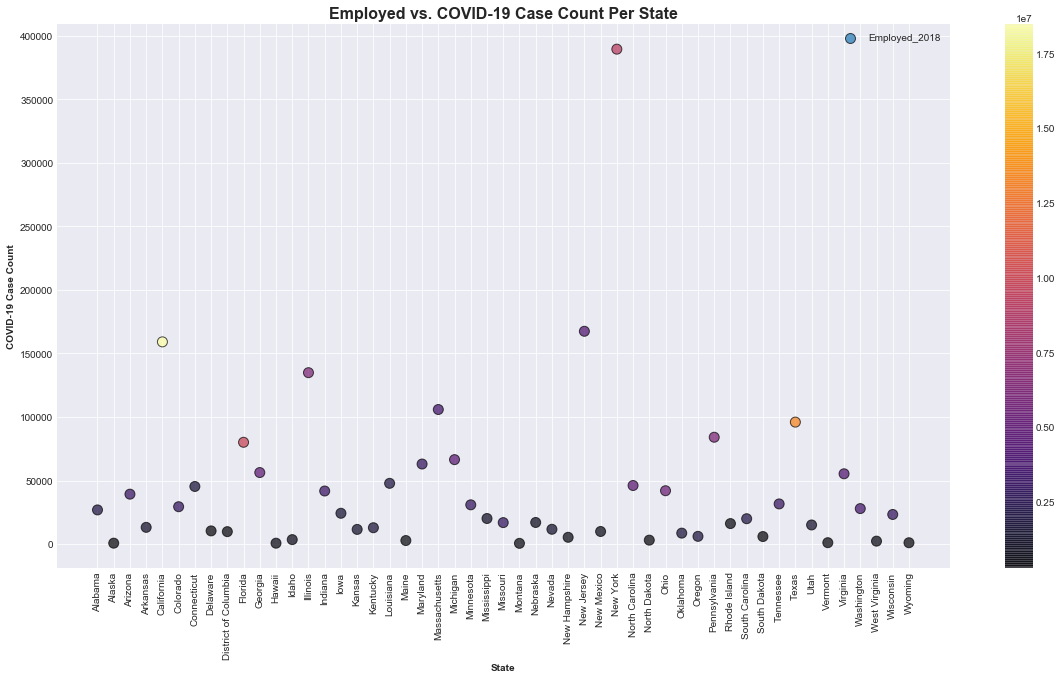

In [27]:
fig = plt.figure(figsize = (20,10))

x = UneploymentDF['State'] 
y = UneploymentDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = UneploymentDF['Employed_2018'], cmap = 'inferno')
plt.title('Employed vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Employed_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

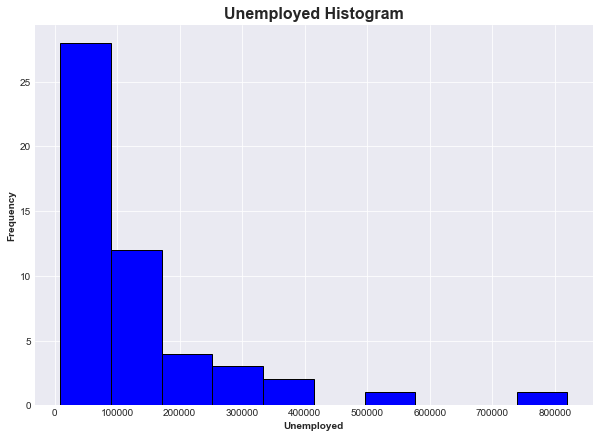

In [28]:
plt.style.use('seaborn-darkgrid')

UneploymentDF['Unemployed_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Unemployed Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployed', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

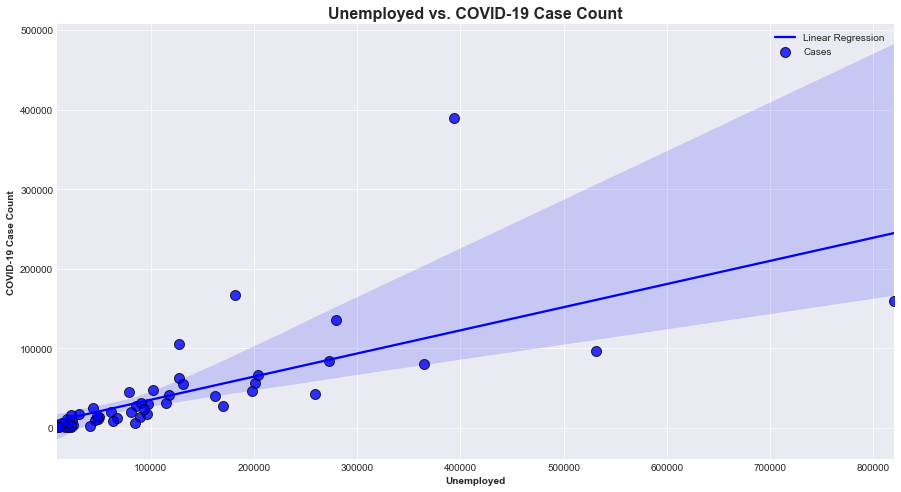

In [29]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Unemployed_2018', y = 'cases', data = UneploymentDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Unemployed vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployed', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [30]:
spearmanr(UneploymentDF['cases'], UneploymentDF['Unemployed_2018'])

SpearmanrResult(correlation=0.907420814479638, pvalue=4.421058865335246e-20)

In [31]:
model3 = sm.OLS(UneploymentDF['cases'], UneploymentDF['Unemployed_2018']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              81.43
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.53e-12
Time:                        00:14:34   Log-Likelihood:                         -620.63
No. Observations:                  51   AIC:                                      1243.
Df Residuals:                      50   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Unemployed_2018     0.3116      0.035      9.024      0.000       0.242       0.381
==============================================================================
Omnibus:                       70.411   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.771
Skew:                           3.541   Prob(JB):                    1.96e-177
Kurtosis:                      21.242   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

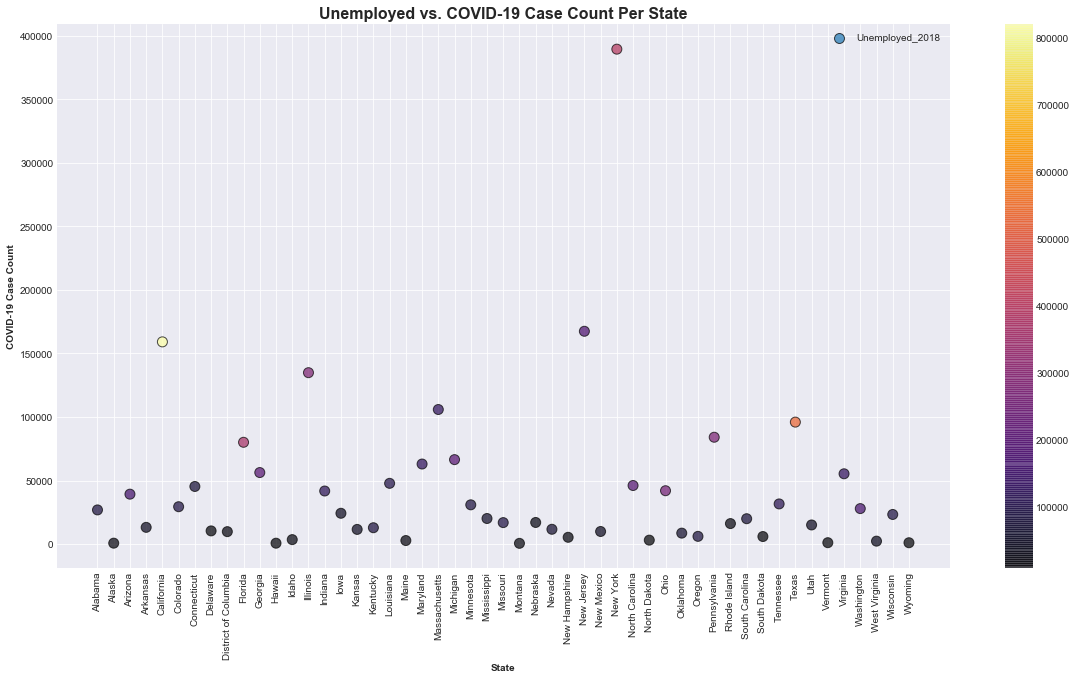

In [32]:
fig = plt.figure(figsize = (20,10))

x = UneploymentDF['State'] 
y = UneploymentDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = UneploymentDF['Unemployed_2018'], cmap = 'inferno')
plt.title('Unemployed vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Unemployed_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

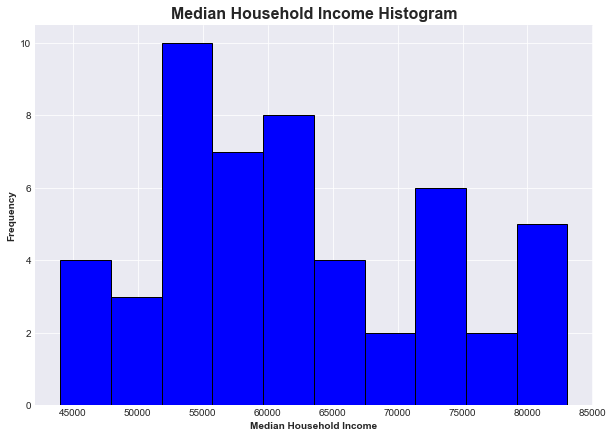

In [33]:
plt.style.use('seaborn-darkgrid')

UneploymentDF['Median_Household_Income_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Median Household Income Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Median Household Income', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

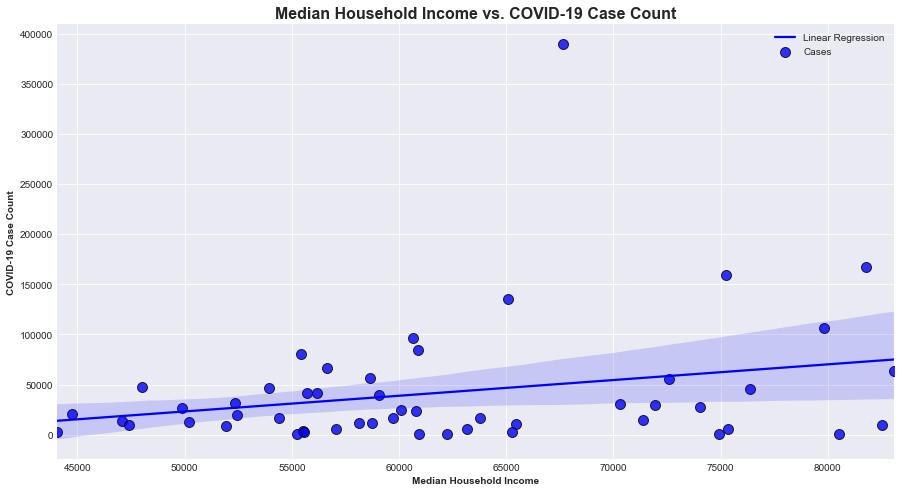

In [34]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Median_Household_Income_2018', y = 'cases', data = UneploymentDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Median Household Income vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Median Household Income', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();



In [35]:
spearmanr(UneploymentDF['cases'], UneploymentDF['Median_Household_Income_2018'])

SpearmanrResult(correlation=0.16226244343891402, pvalue=0.2552806297184707)

In [36]:
model5 = sm.OLS(UneploymentDF['cases'], UneploymentDF['Median_Household_Income_2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              25.79
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    5.66e-06
Time:                        00:14:36   Log-Likelihood:                         -634.67
No. Observations:                  51   AIC:                                      1271.
Df Residuals:                      50   BIC:                                      1273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Median_Household_Income_2018     0.7013      0.138      5.079      0.000       0.424       0.979
==============================================================================
Omnibus:                       70.613   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.229
Skew:                           3.661   Prob(JB):                    2.19e-155
Kurtosis:                      19.780   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

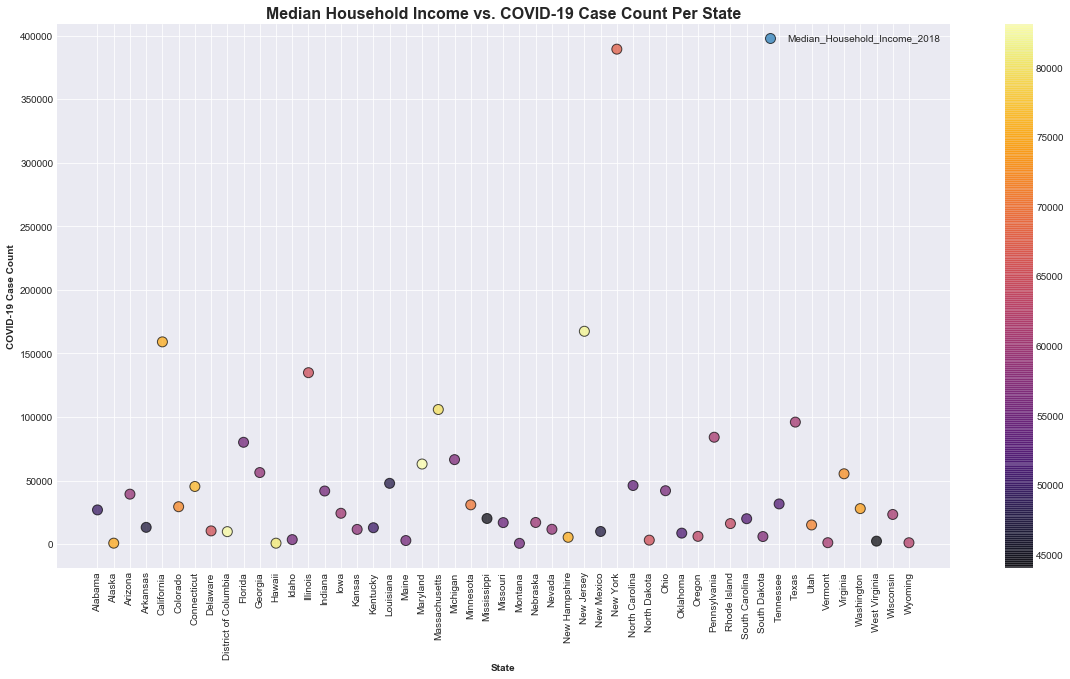

In [37]:
fig = plt.figure(figsize = (20,10))

x = UneploymentDF['State'] 
y = UneploymentDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = UneploymentDF['Median_Household_Income_2018'], cmap = 'inferno')
plt.title('Median Household Income vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Median_Household_Income_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [38]:
model6 = sm.OLS(UneploymentDF['cases'], UneploymentDF[['Civilian_labor_force_2018', 'Employed_2018','Unemployed_2018', 
                                 'Median_Household_Income_2018']]).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              27.11
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    2.10e-10
Time:                        00:14:37   Log-Likelihood:                         -620.00
No. Observations:                  51   AIC:                                      1246.
Df Residuals:                      48   BIC:                                      1252.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Civilian_labor_force_2018        0.1324      0.119      1.110      0.273      -0.107       0.372
Employed_2018                   -0.1377      0.135     -1.018      0.314      -0.410       0.134
Unemployed_2018                  0.2701      0.255      1.061      0.294      -0.242       0.782
Median_Household_Income_2018     0.1632      0.149      1.095      0.279      -0.137       0.463
==============================================================================
Omnibus:                       77.929   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1076.315
Skew:                           4.059   Prob(JB):                    1.91e-234
Kurtosis:                      23.990   Cond. No.                     2.98e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""